In [28]:
from simpledbf import Dbf5
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import date
import math
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

In [29]:
dbf = Dbf5('data/SIH15_LATLONG_WGS84.dbf')

In [30]:
df = dbf.to_dataframe()

In [31]:
df.shape

(554202, 34)

In [32]:
df.columns

Index(['CD_GEOCODI', 'LAT_SC', 'LONG_SC', 'P_SEXO', 'P_IDADE', 'P_RACA',
       'LV_INSTRU', 'LAT_CNES', 'LONG_CNES', 'CNES', 'GESTOR_IDE', 'CAR_INTEN',
       'CMPT', 'DT_EMISSAO', 'DT_INTERNA', 'DT_SAIDA', 'COMPLEXIDA',
       'ESPECIALID', 'PROC_RE', 'DIAG_PR', 'DIAG_SE1', 'DIAG_SE2', 'DIAG_SE3',
       'DIARIAS', 'DIARIAS_UT', 'DIARIAS_UI', 'DIAS_PERM', 'FINACIAME',
       'VAL_TOT', 'COD_DA', 'DA', 'SUB', 'STS', 'CRS'],
      dtype='object')

In [33]:
df.head()

,CD_GEOCODI,LAT_SC,LONG_SC,P_SEXO,P_IDADE,P_RACA,LV_INSTRU,LAT_CNES,LONG_CNES,CNES,...,DIARIAS_UT,DIARIAS_UI,DIAS_PERM,FINACIAME,VAL_TOT,COD_DA,DA,SUB,STS,CRS
0,3.550309e+14,-23.536891,-46.641791,M,0,1,0,-23.542191,-46.648879,2688689,...,4,0,63,6,0.0,67,REPUBLICA,SE,SE,CENTRO
1,3.550309e+14,-23.497367,-46.424593,F,0,1,0,-23.542191,-46.648879,2688689,...,9,0,9,6,0.0,86,VILA CURUCA,ITAIM PAULISTA,ITAIM PAULISTA,LESTE
2,3.550308e+14,-23.586291,-46.611943,F,41,3,0,-23.595851,-46.608842,2077469,...,0,0,1,6,0.0,33,IPIRANGA,IPIRANGA,IPIRANGA,SUDESTE
3,3.550309e+14,-23.482603,-46.764196,M,44,3,0,-23.555286,-46.667091,2028840,...,0,0,31,6,0.0,73,SAO DOMINGOS,PIRITUBA,PIRITUBA/PERUS,NORTE
4,3.550309e+14,-23.516294,-46.627142,M,24,3,0,-23.555286,-46.667091,2028840,...,55,0,75,6,0.0,71,SANTANA,SANTANA / TUCURUVI,SANTANA / TUCURUVI/JACANA / TREMEMBE,NORTE


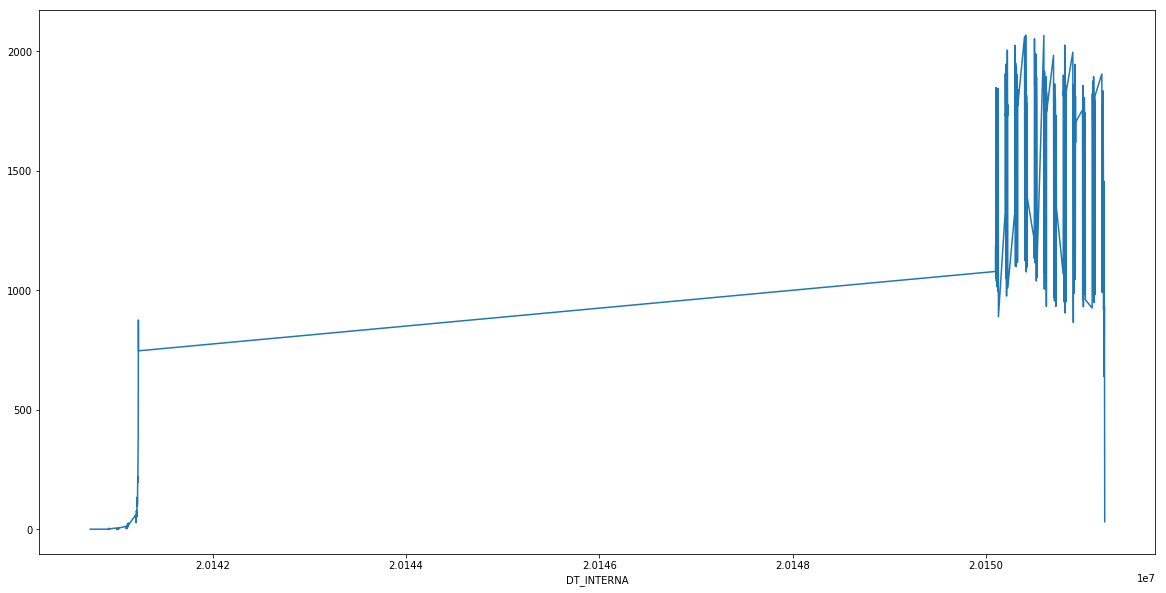

In [34]:
df.groupby(['DT_INTERNA']).count()['CNES'].plot.line()

In [35]:
df2 = pd.DataFrame(df.groupby(['DT_INTERNA']).count()['CNES'].rename('quantidade')).reset_index()
df2.shape

(473, 2)

In [36]:
df2.head()

,DT_INTERNA,quantidade
0,20140731,1
1,20140811,1
2,20140901,1
3,20140902,1
4,20140904,1


In [37]:
df2[:100]

,DT_INTERNA,quantidade
0,20140731,1
1,20140811,1
2,20140901,1
3,20140902,1
4,20140904,1
5,20140911,1
6,20140916,2
7,20140917,2
8,20140918,1
9,20140919,1


In [38]:
df2.tail()

,DT_INTERNA,quantidade
468,20151227,713
469,20151228,933
470,20151229,547
471,20151230,251
472,20151231,32


### 2014 tá estranho, remover essas linhas

In [39]:
df2 = df2.loc[df2['DT_INTERNA'] > 20150000]

### workaround do bug de view limit
[https://github.com/matplotlib/matplotlib/issues/11337](https://github.com/matplotlib/matplotlib/issues/11337)

cria um index na mao, e apaga a coluna ao invés de tentar converter ela pra datetime

In [40]:
df2.index = pd.date_range(start='1/1/2015', end='31/12/2015')

In [41]:
df2 = df2.drop(columns=['DT_INTERNA'])

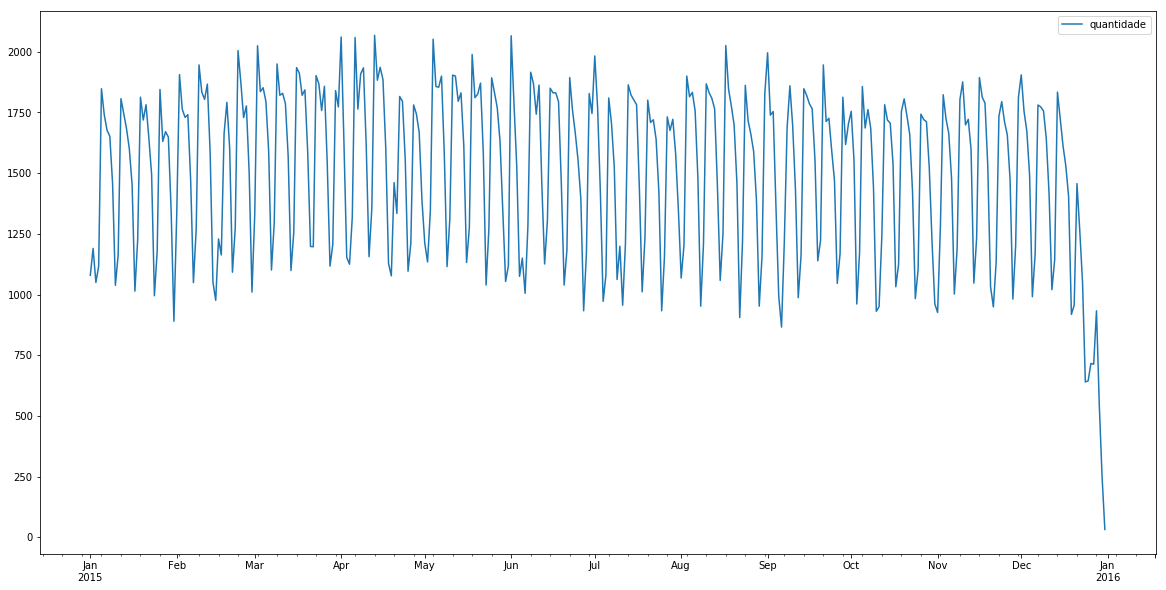

In [42]:
plt.rcParams['figure.figsize'] = [20, 10]
df2.plot.line()

In [43]:
#df2['DT_INTERNA'] = df2['DT_INTERNA'].apply(lambda dt: pd.to_datetime(str(dt), format='%Y%m%d'))

#df2['DT_INTERNA'] = df2['DT_INTERNA'].apply(lambda dt: datetime.strptime(str(dt), '%Y%m%d'))

In [44]:
df2.dtypes

quantidade    int64
dtype: object

In [45]:

df2['day'] = df2.index.day
df2['dayofweek'] = df2.index.dayofweek
df2['month'] = df2.index.month
df2['year'] = df2.index.year

In [46]:
df2.head(15)

,quantidade,day,dayofweek,month,year
2015-01-01,1079,1,3,1,2015
2015-01-02,1190,2,4,1,2015
2015-01-03,1050,3,5,1,2015
2015-01-04,1116,4,6,1,2015
2015-01-05,1848,5,0,1,2015
2015-01-06,1741,6,1,1,2015
2015-01-07,1677,7,2,1,2015
2015-01-08,1652,8,3,1,2015
2015-01-09,1456,9,4,1,2015
2015-01-10,1038,10,5,1,2015


In [47]:
# split into train and test sets
train_size = int(len(df2) * 0.75)
test_size = len(df2) - train_size

In [48]:
removed_feats = ['quantidade']
feats = [c for c in df2.columns if c not in removed_feats]

In [49]:
train = df2[:train_size]
test = df2[train_size:]

In [50]:
len(train), len(test), len(train) + len(test) 

(273, 92, 365)

# Random Forest

In [51]:
reg = RandomForestRegressor(max_depth=5, random_state=0) 

In [52]:
reg.fit(train[feats], train[removed_feats]) 

/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [53]:
trainPredict = reg.predict(train[feats])
testPredict = reg.predict(test[feats])

In [54]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test['quantidade'], testPredict))

# RMSE
print("Root Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(test['quantidade'], testPredict)))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(test['quantidade'], testPredict))

Mean squared error: 120488.50
Root Mean squared error: 347.11
R2 score: 0.27


In [55]:
#enche as previsoes de teste de NaN para o plot
for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, np.nan)

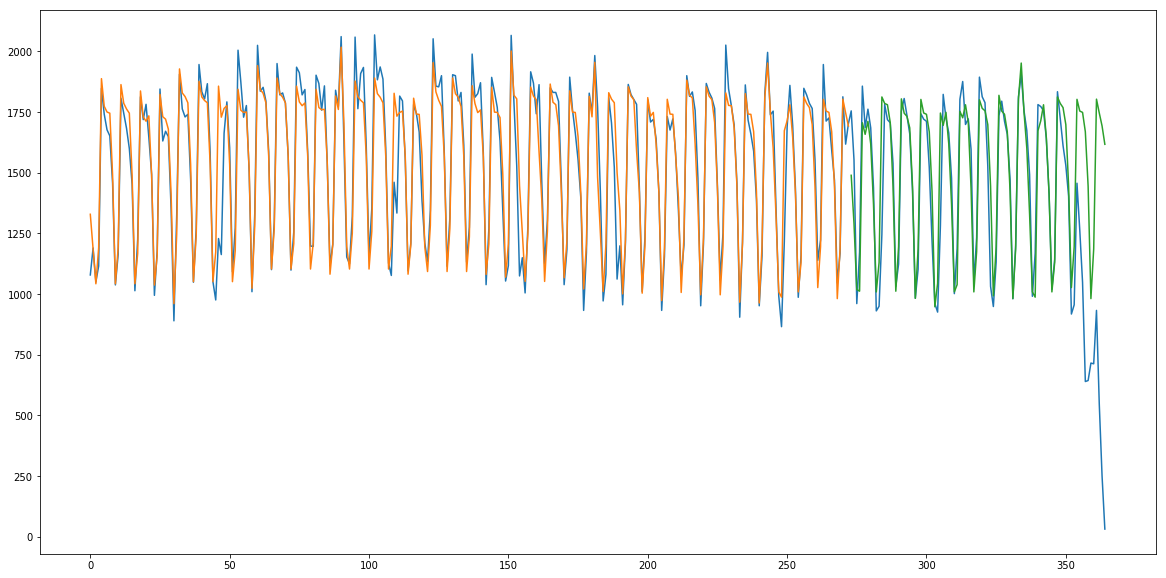

In [56]:
 # plot baseline and predictions
plt.plot(df2['quantidade'].reset_index().drop(columns=['index']))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

# MLP

In [63]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(32, input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(4, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [64]:
model.fit(train[feats], train['quantidade'], epochs=600, batch_size=32, verbose=1) 

Epoch 1/600
273/273 [==============================] - 0s 2ms/step - loss: 2551625.8819
Epoch 2/600
273/273 [==============================] - 0s 207us/step - loss: 2473482.5971
Epoch 3/600
273/273 [==============================] - 0s 219us/step - loss: 2473455.1016
Epoch 4/600
273/273 [==============================] - 0s 191us/step - loss: 2473427.3022
Epoch 5/600
273/273 [==============================] - 0s 161us/step - loss: 2473399.9121
Epoch 6/600
273/273 [==============================] - 0s 162us/step - loss: 2473372.3196
Epoch 7/600
273/273 [==============================] - 0s 115us/step - loss: 2473344.6667
Epoch 8/600
273/273 [==============================] - 0s 152us/step - loss: 2473317.1786
Epoch 9/600
273/273 [==============================] - 0s 148us/step - loss: 2473289.5247
Epoch 10/600
273/273 [==============================] - 0s 181us/step - loss: 2473261.7958
Epoch 11/600
273/273 [==============================] - 0s 163us/step - loss: 2473234.2024
Epoch 12/6

273/273 [==============================] - 0s 122us/step - loss: 2471020.5842
Epoch 92/600
273/273 [==============================] - 0s 200us/step - loss: 2470993.0495
Epoch 93/600
273/273 [==============================] - 0s 109us/step - loss: 2470965.4002
Epoch 94/600
273/273 [==============================] - 0s 158us/step - loss: 2466432.6484
Epoch 95/600
273/273 [==============================] - 0s 168us/step - loss: 2441927.2381
Epoch 96/600
273/273 [==============================] - 0s 133us/step - loss: 2367561.0220
Epoch 97/600
273/273 [==============================] - 0s 183us/step - loss: 2159308.5572
Epoch 98/600
273/273 [==============================] - 0s 186us/step - loss: 1701087.4235
Epoch 99/600
273/273 [==============================] - 0s 120us/step - loss: 917966.4104
Epoch 100/600
273/273 [==============================] - 0s 133us/step - loss: 219604.7248
Epoch 101/600
273/273 [==============================] - 0s 127us/step - loss: 175978.6013
Epoch 102/600

273/273 [==============================] - 0s 130us/step - loss: 102475.4630
Epoch 182/600
273/273 [==============================] - 0s 326us/step - loss: 102646.9808
Epoch 183/600
273/273 [==============================] - 0s 137us/step - loss: 102029.2320
Epoch 184/600
273/273 [==============================] - 0s 163us/step - loss: 102568.9952
Epoch 185/600
273/273 [==============================] - 0s 143us/step - loss: 102387.4646
Epoch 186/600
273/273 [==============================] - 0s 167us/step - loss: 102520.2133
Epoch 187/600
273/273 [==============================] - 0s 142us/step - loss: 102269.0342
Epoch 188/600
273/273 [==============================] - 0s 126us/step - loss: 102137.1092
Epoch 189/600
273/273 [==============================] - 0s 185us/step - loss: 102199.6798
Epoch 190/600
273/273 [==============================] - 0s 177us/step - loss: 102313.4435
Epoch 191/600
273/273 [==============================] - 0s 396us/step - loss: 101966.0624
Epoch 192/600

273/273 [==============================] - 0s 229us/step - loss: 100264.9933
Epoch 272/600
273/273 [==============================] - 0s 506us/step - loss: 100786.2881
Epoch 273/600
273/273 [==============================] - 0s 375us/step - loss: 100824.9545
Epoch 274/600
273/273 [==============================] - 0s 309us/step - loss: 99691.8785
Epoch 275/600
273/273 [==============================] - 0s 583us/step - loss: 100674.6903
Epoch 276/600
273/273 [==============================] - 0s 473us/step - loss: 99263.9473
Epoch 277/600
273/273 [==============================] - 0s 385us/step - loss: 100614.3676
Epoch 278/600
273/273 [==============================] - 0s 165us/step - loss: 99875.6342
Epoch 279/600
273/273 [==============================] - 0s 414us/step - loss: 99986.9665
Epoch 280/600
273/273 [==============================] - 0s 264us/step - loss: 100177.6529
Epoch 281/600
273/273 [==============================] - 0s 164us/step - loss: 100116.5867
Epoch 282/600
273

273/273 [==============================] - 0s 358us/step - loss: 97174.0185
Epoch 363/600
273/273 [==============================] - 0s 174us/step - loss: 96913.8899
Epoch 364/600
273/273 [==============================] - 0s 183us/step - loss: 97035.4781
Epoch 365/600
273/273 [==============================] - 0s 185us/step - loss: 96679.8338
Epoch 366/600
273/273 [==============================] - 0s 202us/step - loss: 96849.9326
Epoch 367/600
273/273 [==============================] - 0s 143us/step - loss: 96613.5840
Epoch 368/600
273/273 [==============================] - 0s 154us/step - loss: 96747.7183
Epoch 369/600
273/273 [==============================] - 0s 137us/step - loss: 96988.1950
Epoch 370/600
273/273 [==============================] - 0s 163us/step - loss: 96564.1275
Epoch 371/600
273/273 [==============================] - 0s 201us/step - loss: 96547.1769
Epoch 372/600
273/273 [==============================] - 0s 159us/step - loss: 97564.6297
Epoch 373/600
273/273 [=

273/273 [==============================] - 0s 182us/step - loss: 90312.8421
Epoch 454/600
273/273 [==============================] - 0s 207us/step - loss: 90789.4944
Epoch 455/600
273/273 [==============================] - 0s 195us/step - loss: 90080.4221
Epoch 456/600
273/273 [==============================] - 0s 240us/step - loss: 90383.3400
Epoch 457/600
273/273 [==============================] - 0s 375us/step - loss: 90761.8278
Epoch 458/600
273/273 [==============================] - 0s 289us/step - loss: 90683.9731
Epoch 459/600
273/273 [==============================] - 0s 212us/step - loss: 90167.1903
Epoch 460/600
273/273 [==============================] - 0s 159us/step - loss: 89769.4529
Epoch 461/600
273/273 [==============================] - 0s 147us/step - loss: 89806.6653
Epoch 462/600
273/273 [==============================] - 0s 179us/step - loss: 89506.6585
Epoch 463/600
273/273 [==============================] - 0s 174us/step - loss: 89614.1141
Epoch 464/600
273/273 [=

273/273 [==============================] - 0s 168us/step - loss: 73742.0446
Epoch 545/600
273/273 [==============================] - 0s 203us/step - loss: 74449.6277
Epoch 546/600
273/273 [==============================] - 0s 281us/step - loss: 73519.1728
Epoch 547/600
273/273 [==============================] - 0s 137us/step - loss: 74486.7410
Epoch 548/600
273/273 [==============================] - 0s 194us/step - loss: 72590.4253
Epoch 549/600
273/273 [==============================] - 0s 119us/step - loss: 72269.1042
Epoch 550/600
273/273 [==============================] - 0s 174us/step - loss: 71771.6087
Epoch 551/600
273/273 [==============================] - 0s 236us/step - loss: 71806.5953
Epoch 552/600
273/273 [==============================] - 0s 237us/step - loss: 71352.0881
Epoch 553/600
273/273 [==============================] - 0s 231us/step - loss: 71233.3917
Epoch 554/600
273/273 [==============================] - 0s 123us/step - loss: 72187.9380
Epoch 555/600
273/273 [=

In [65]:
# Estimate model performance
trainScore = model.evaluate(train[feats], train['quantidade'], verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(test[feats], test['quantidade'], verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 43841.17 MSE (209.38 RMSE)
Test Score: 114653.97 MSE (338.61 RMSE)


In [66]:
trainPredict = model.predict(train[feats])
testPredict = model.predict(test[feats])

In [67]:
#enche as previsoes de teste de NaN para o plot
for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, np.nan)

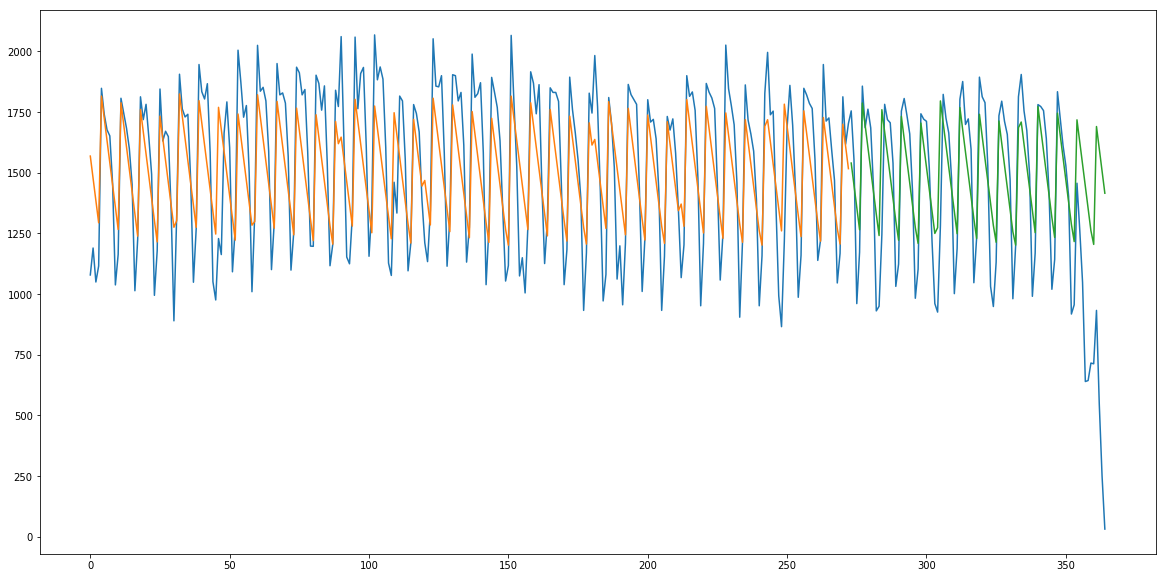

In [68]:
 # plot baseline and predictions
plt.plot(df2['quantidade'].reset_index().drop(columns=['index']))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()